# **Необходимые подключения**

Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

In [3]:
pd.set_option('display.max_columns', 100) # раскрыть все стольбцы
pd.set_option('display.float_format', '{:.2f}'.format) # округлять до сотых

# **Первичный осмотр и подготовка данных**

Чтение данных

*Источник: [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)*


In [4]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv') # загрузка данных

In [5]:
df.info() # Общая информация
df.size # Количество значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

51450

<details>
<summary><b> Описание полей датасета (нажмите, чтобы развернуть)</b></summary>

| Поле                           | Описание                                    |
|--------------------------------|---------------------------------------------|
| **Age** | Возраст сотрудника (в годах)|
| **Attrition** | Уволен (Yes/No)|
| **BusinessTravel** | Командировки (Travel_Rarely, Travel_Frequently, Non-Travel)|
| **DailyRate** | Дневная ставка оплаты (число)|
| **Department** | Отдел (Sales, Research & Developmen, Human Resource)|
| **DistanceFromHome** | Расстояние от дома до работы (в км/милях)|
| **Education** | Образование (от 1 до 5, где Below College - 1, College - 2, Bachelor - 3, Master - 4, Doctor - 5)|
| **EducationField** | Область образования (Life Sciences, Medical, Marketing, Technical Degree, Human Resources и др.)|
| **EmployeeCount** | Количество сотрудников|
| **EmployeeNumber** | Номер сотрудника|
| **EnvironmentSatisfaction** | Удовлетворенность условиями работы (от 1 до 4, где Low - 1, Medium - 2, High - 3, Very High - 4)|
| **Gender** | Пол (Female/Male)|
| **HourlyRate** | Почасовая ставка оплаты (число)|
| **JobInvolvement** | Вовлеченность в работу (от 1 до 4, где Low - 1, Medium - 2, High - 3, Very High - 4)|
| **JobLevel** | Уровень работы (от 1 до 5)|
| **JobRole** | Должность (Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources)|
| **JobSatisfaction** | Удовлетворенность работой (от 1 до 4, где Low - 1, Medium - 2, High - 3, Very High - 4)|
| **MaritalStatus** | Семейное положение (Single, Married, Divorced)|
| **MonthlyIncome** | Ежемесячный доход (число)|
| **MonthlyRater** | Ежемесячная ставка оплаты труда (число)|
| **NumCompaniesWorked** | Количество лет, отработанных в компании (число)|
| **Over18** | Старше 18 лет (Yes/No)|
| **OverTime** | Переработка (Yes/No)|
| **PercentSalaryHike** | Процент повышения зарплаты (число)|
| **PerformanceRating** | Рейтинг производительности (от 1 до 4, где Low - 1, Good - 2, Excellent - 3, Outstanding - 4)|
| **RelationshipSatisfaction** | Удовлетворенность отношениями (от 1 до 4, где Low - 1, Medium - 2, High - 3, Very High - 4)|
| **StandardHours** | Стандартное количество рабочих часов в неделю, установленное компанией для сотрудников|
| **StockOptionLevel** | Шкала от 0 до 3|
| **TotalWorkingYears** | Общий стаж работы|
| **TrainingTimesLastYear** | Количество часов обучения в прошлом году|
| **WorkLifeBalance** | Баланс между работой и личной жизнью (от 1 до 4, где Bad - 1, Good - 2, Better - 3, Best - 4)|
| **YearsAtCompany** | Количество лет в компании (число)|
| **YearsInCurrentRole** | Количество лет в текущей должности (число)|
| **YearsSinceLastPromotion** | Количество лет с последнего повышения (число)|
| **YearsWithCurrManager** | Количество лет с текущим менеджером (число)|
</details>

In [8]:
df.describe() # Статистические сведения о датафрейме

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


*Вывод по статистическим сведениям датафрейма*
<details>
<summary><b> нажмите, чтобы развернуть</b></summary>

Возраст работников: средний – составляет 37 лет, минимум – 18 и максимум – 60;

Расстояние от дома до работы в среднем 9,19 (км/миль), при этом некоторые сотрудники живут всего в 1 (км/миль), а другие в 29 (км/миль) от своего дома;

Средняя дневная ставка – 802,49 с широким диапазоном от 102,00 до 1499,00;

Средний ежемесячный доход составляет примерно 6502,93, минимально – 1009,00, максимально – 19999,00;

В среднем сотрудники имеют около 11,28 лет общего рабочего стажа, некоторые только начали, а другие имеют до 40 лет опыта;

Сроки работы в компании: в среднем 7 лет (от 3-х до 9-и)
</details>

Пропущенные значения

<Axes: >

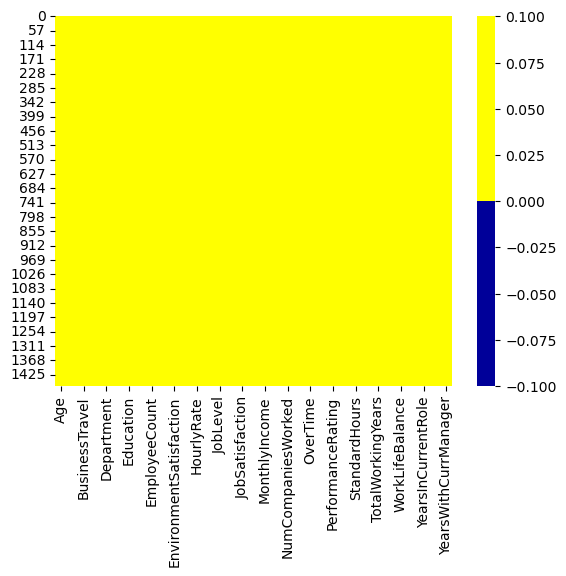

In [9]:
# Визуализация. Определяем цвета: желтый - данные заполнены, синий - пропущенные
cols = df.columns[:35]
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [10]:
df.isnull().sum() # Считаем количество пропущенных значений в каждом столбце

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
df_nan = df.dropna(how='all') # Определяем наличие пустых значений в строках
df_nan

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


*Вывод по пропущенным значениям*
<details>
<summary><b> нажмите, чтобы развернуть</b></summary>

Пропущенные значения полностью отсутствуют
</details>

Дубли

In [12]:
if len(df) == len(df.drop_duplicates()): # проверка на дубли
    print("Все строки уникальны.")
else:
    print("Есть дубликаты.")

Все строки уникальны.


Выбросы

/tmp/ipykernel_229/1362587391.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_229/1362587391.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_229/1362587391.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_229/1362587391.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_229/1362587391.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_229/1362587391.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_229/1362587391.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_229/1362587391.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_229/1362587391.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipyke

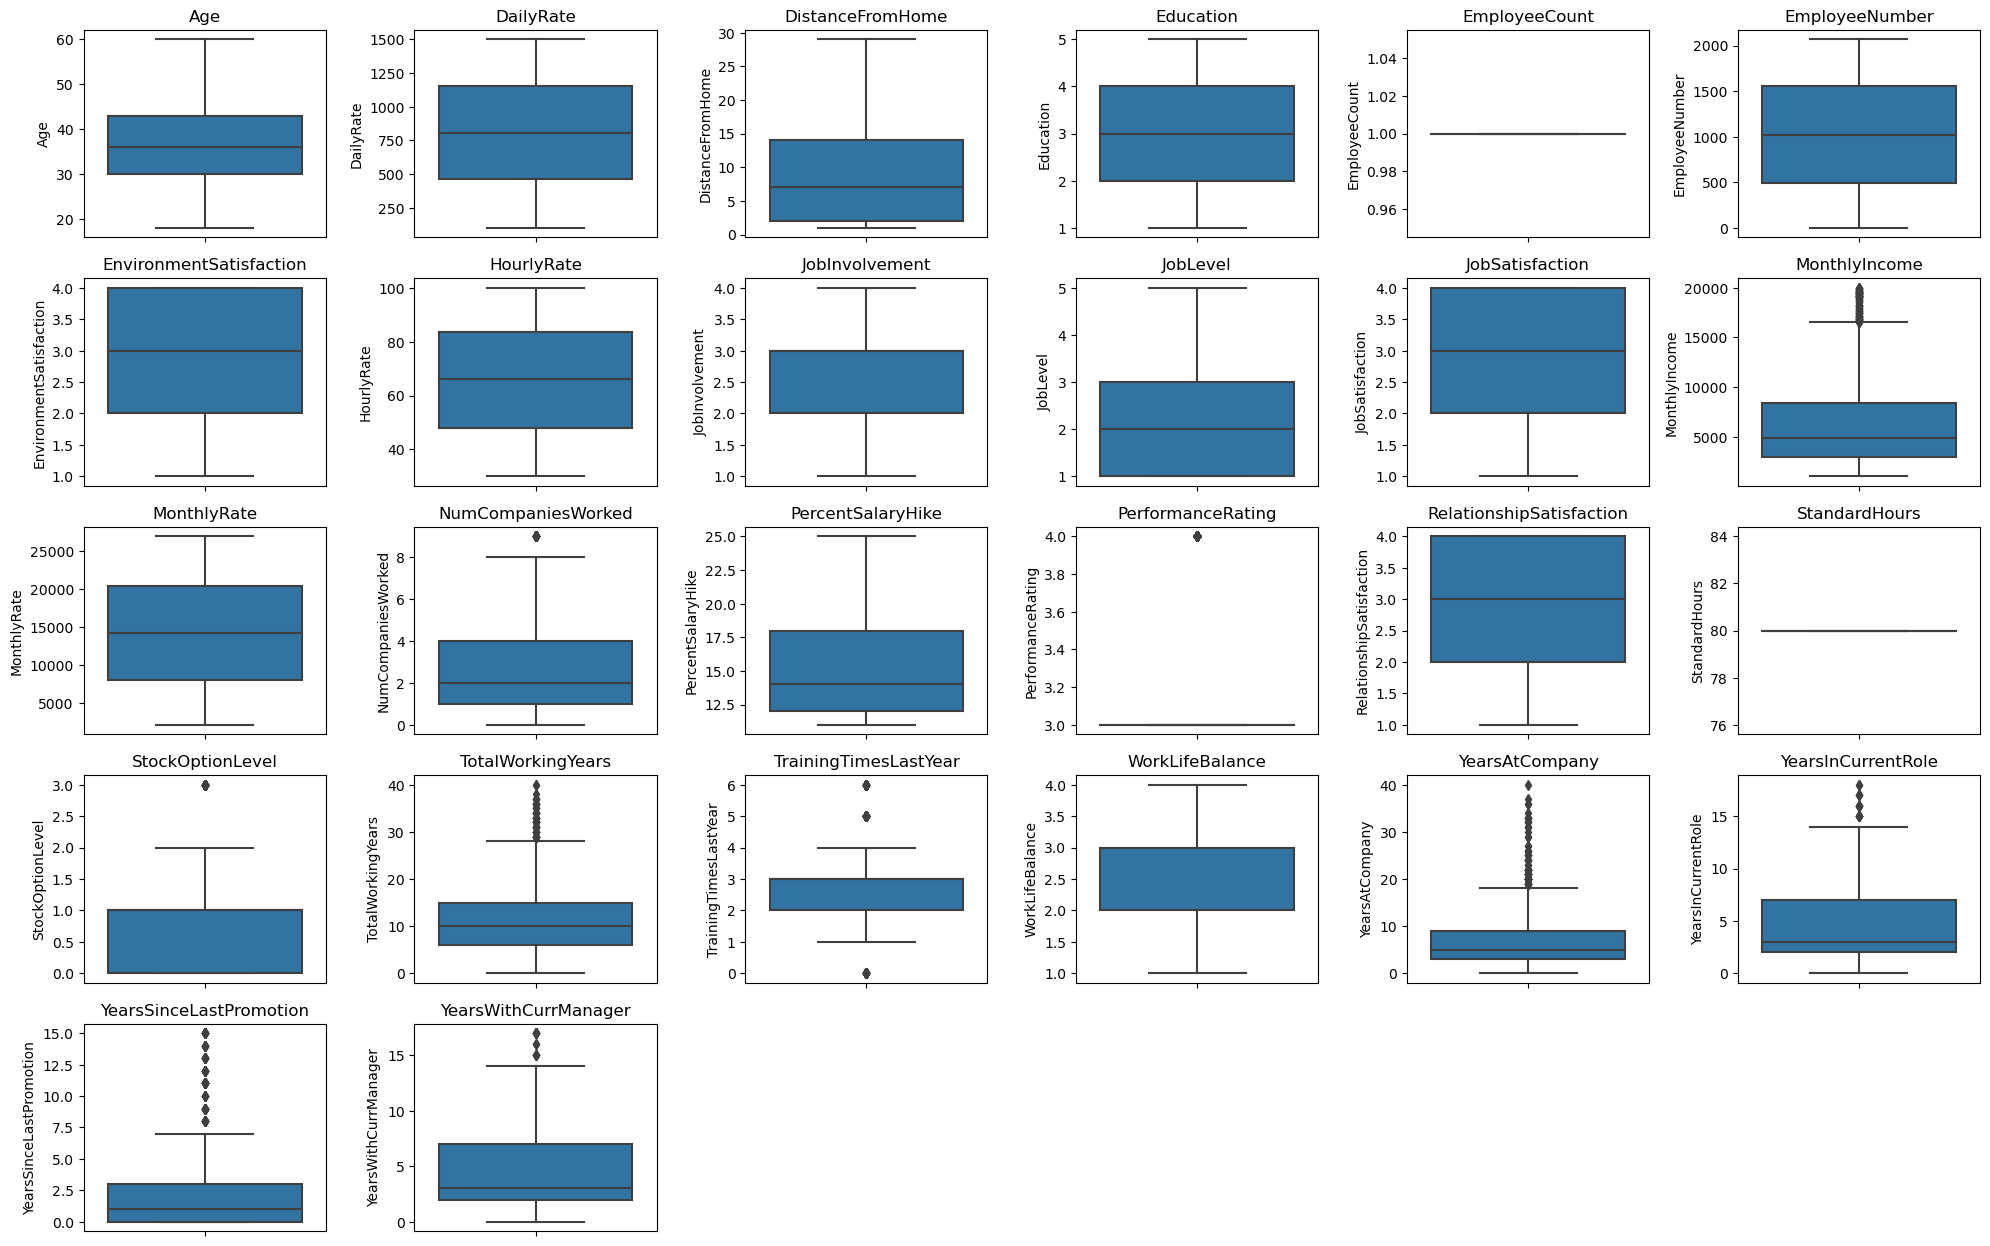

In [13]:
# Выберем только числовые колонки для визуализации
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Настроим размер графика
plt.figure(figsize=(20, 15))

# Создадим subplot с несколькими графиками
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

*Вывод по выбросам*
<details>
<summary><b> нажмите, чтобы развернуть</b></summary>

Наличие выбросов обнаружено в:
-	MonthlyIncome
-	NumCompaniesWorked
-	PerformanceRating
-	StockOptionLevel
-	TotalWorkingYears
-	TrainingTimesLastYear
-	YearsAtCompany
-	YearsInCurrentRole
-	YearsSinceLastPromotion
-	YearsWithCurrManager

Выбросы в параметрах оставлены без изменений, т.к. не оказывают большого влияния. Однако данные приняты во внимание
</details>

Неинформативные признаки

In [14]:
num_rows = len(df.index) # определяем неинформативные признаки
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

EmployeeCount: 100.00%
EmployeeCount
1    1470
Name: count, dtype: int64

Over18: 100.00%
Over18
Y    1470
Name: count, dtype: int64

StandardHours: 100.00%
StandardHours
80    1470
Name: count, dtype: int64



*Вывод по неинформативным признакам*
<details>
<summary><b> нажмите, чтобы развернуть</b></summary>

В параметрах EmployeeCount, Over18, StandardHours более 95% строк содержат одно и то же значение. Соответственно, они являются неинформативными

</details>

Опечатки в столбцах с типом данных object (Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime)

In [15]:
df['Department'].value_counts(dropna=False)

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

*Вывод по опечаткам*
<details>
<summary><b> нажмите, чтобы развернуть</b></summary>

С помощью данной строки кода были проверены категориальные данные. Опечатки не выявлены

</details>

# **Кастомизируем вывод результатов для удобства дальнейшего анализа**

In [17]:
# выбраем только нужные столбцы (таким образом удаляем неинформативные) и меням покядок показателей
ordered_columns = ['Attrition','Department', 'JobRole', 'JobLevel', 'BusinessTravel','Age', 'Gender', 'Education', 'EducationField', 'TrainingTimesLastYear','MaritalStatus', 'DistanceFromHome', 'HourlyRate', 'DailyRate', 'MonthlyRate', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike', 'StockOptionLevel','NumCompaniesWorked', 'PerformanceRating', 'JobInvolvement', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
df = df[ordered_columns]
df_0 = df
# переводим бинарные категориальные переменные (Yes, No) в тип целочисленных
df = df.applymap(lambda x: 0 if x == 'No' else 1 if x == 'Yes' else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Department                1470 non-null   object
 2   JobRole                   1470 non-null   object
 3   JobLevel                  1470 non-null   int64 
 4   BusinessTravel            1470 non-null   object
 5   Age                       1470 non-null   int64 
 6   Gender                    1470 non-null   object
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   TrainingTimesLastYear     1470 non-null   int64 
 10  MaritalStatus             1470 non-null   object
 11  DistanceFromHome          1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  DailyRate                 1470 non-null   int64 
 14  MonthlyRate             

# **Анализ и визуализация**

In [18]:
yes_1 = df[df['Attrition'] == 1] # уволенные
no_0  = df[df['Attrition'] == 0]  # работающие
print("Всего =", len(df))
print("Количество уволенных сотрудников =", len(yes_1))
print("Процент уволенных сотрудников =", 1.*len(yes_1)/len(df)*100.0, "%")
print("Количество работающих сотрудников =", len(no_0))
print("Процент работающих сотрудников =", 1.*len(no_0)/len(df)*100.0, "%")

Всего = 1470
Количество уволенных сотрудников = 237
Процент уволенных сотрудников = 16.122448979591837 %
Количество работающих сотрудников = 1233
Процент работающих сотрудников = 83.87755102040816 %


In [19]:
yes_1.describe()

,Attrition,JobLevel,Age,Education,TrainingTimesLastYear,DistanceFromHome,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,OverTime,PercentSalaryHike,StockOptionLevel,NumCompaniesWorked,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00
mean,1.00,1.64,33.61,2.84,2.62,10.63,65.57,750.36,14559.31,4787.09,0.54,15.10,0.53,2.94,3.16,2.52,2.46,2.47,2.60,2.66,8.24,5.13,2.90,1.95,2.85
std,0.00,0.94,9.69,1.01,1.25,8.45,20.10,401.90,7208.15,3640.21,0.50,3.77,0.86,2.68,0.36,0.77,1.17,1.12,1.13,0.82,7.17,5.95,3.17,3.15,3.14
min,1.00,1.00,18.00,1.00,0.00,1.00,31.00,103.00,2326.00,1009.00,0.00,11.00,0.00,0.00,3.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,28.00,2.00,2.00,3.00,50.00,408.00,8870.00,2373.00,0.00,12.00,0.00,1.00,3.00,2.00,1.00,1.00,2.00,2.00,3.00,1.00,0.00,0.00,0.00
50%,1.00,1.00,32.00,3.00,2.00,9.00,66.00,699.00,14618.00,3202.00,1.00,14.00,0.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00,7.00,3.00,2.00,1.00,2.00
75%,1.00,2.00,39.00,4.00,3.00,17.00,84.00,1092.00,21081.00,5916.00,1.00,17.00,1.00,5.00,3.00,3.00,4.00,3.00,4.00,3.00,10.00,7.00,4.00,2.00,5.00
max,1.00,5.00,58.00,5.00,6.00,29.00,100.00,1496.00,26999.00,19859.00,1.00,25.00,3.00,9.00,4.00,4.00,4.00,4.00,4.00,4.00,40.00,40.00,15.00,15.00,14.00


In [20]:
no_0.describe()

,Attrition,JobLevel,Age,Education,TrainingTimesLastYear,DistanceFromHome,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,OverTime,PercentSalaryHike,StockOptionLevel,NumCompaniesWorked,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00,1233.00
mean,0.00,2.15,37.56,2.93,2.83,8.92,65.95,812.50,14265.78,6832.74,0.23,15.23,0.85,2.65,3.15,2.77,2.77,2.78,2.73,2.78,11.86,7.37,4.48,2.23,4.37
std,0.00,1.12,8.89,1.03,1.29,8.01,20.38,403.21,7102.26,4818.21,0.42,3.64,0.84,2.46,0.36,0.69,1.07,1.09,1.07,0.68,7.76,6.10,3.65,3.23,3.59
min,0.00,1.00,18.00,1.00,0.00,1.00,30.00,102.00,2094.00,1051.00,0.00,11.00,0.00,0.00,3.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,31.00,2.00,2.00,2.00,48.00,477.00,7973.00,3211.00,0.00,12.00,0.00,1.00,3.00,2.00,2.00,2.00,2.00,2.00,6.00,3.00,2.00,0.00,2.00
50%,0.00,2.00,36.00,3.00,3.00,7.00,66.00,817.00,14120.00,5204.00,0.00,14.00,1.00,2.00,3.00,3.00,3.00,3.00,3.00,3.00,10.00,6.00,3.00,1.00,3.00
75%,0.00,3.00,43.00,4.00,3.00,13.00,83.00,1176.00,20364.00,8834.00,0.00,18.00,1.00,4.00,3.00,3.00,4.00,4.00,4.00,3.00,16.00,10.00,7.00,3.00,7.00
max,0.00,5.00,60.00,5.00,6.00,29.00,100.00,1499.00,26997.00,19999.00,1.00,25.00,3.00,9.00,4.00,4.00,4.00,4.00,4.00,4.00,38.00,37.00,18.00,15.00,17.00


*Вывод по статистическим показателям параметров в сравнении между уволенными и работающими*
<details>
<summary><b> нажмите, чтобы развернуть</b></summary>

*Демографические и профессиональные характеристики*:
*   Возраст (Age) - уволенные в среднем на 4 года моложе
*   Уровень должности (JobLevel) - уволенные чаще занимают более низкие должности
*   Образование (Education) - почти одинаково

*Удовлетворенность и вовлеченность*:
*   Удовлетворенность средой (EnvironmentSatisfaction) - уволенные менее удовлетворены условиями работы
*   Удовлетворенность работой (JobSatisfaction) - уволенные меньше довольны работой
*   Баланс между работой и личной (WorkLifeBalance) - разница не значительна, но уволенные чаще испытывали дисбаланс

*Опыт и карьера*:
*   Общий стаж (TotalWorkingYears) - уволенные менее опытны на 3.62 года
*   Стаж в компании (YearsAtCompany) -
Уволенные работали меньше на 2.24 года
*   Количество лет с последнего повышения (YearsSinceLastPromotion) - разница не значительная, однако уволенные реже получали повышение

*Условия работы*:
*   Переработки (OverTime) - уволенные в 2,3 раза чаще перерабатывали
*   Дистанция до работы (DistanceFromHome) - уволенные жили дальше на 1.71 (км/миль)

*Финансовые показатели*:
*   Зарплата (MonthlyIncome) - уволенные получали примерно на 30% меньше
*   Процент повышения зарплаты (PercentSalaryHike) - почти одинаково
*   Бонусы (StockOptionLevel) - уволенные реже получали бонусы

*Обучение и развитие*:
* 	Количество часов обучения в прошлом году(TrainingTimesLastYear) - разница незначительная, однако уволенные реже проходили обучение

| Уволенные сотрудники | Работающие сотрудники |
|--------------------------------|---------------------------------------------|
| Более молодые, занимали более низкие должности | Более опытные, занимают выше должности |
| Менее удовлетворены работой и условиями | Больше удовлетворены работой |
| Чаще работали сверхурочно, но получали меньше | Реже перерабатывают, но имеют более высокий доход |
| Жили дальше от работы | Чаще получают бонусы и обучение |
| Имели меньший стаж и реже получали повышения |   |
</details>

*Анализ числовых параметров по уволенным*

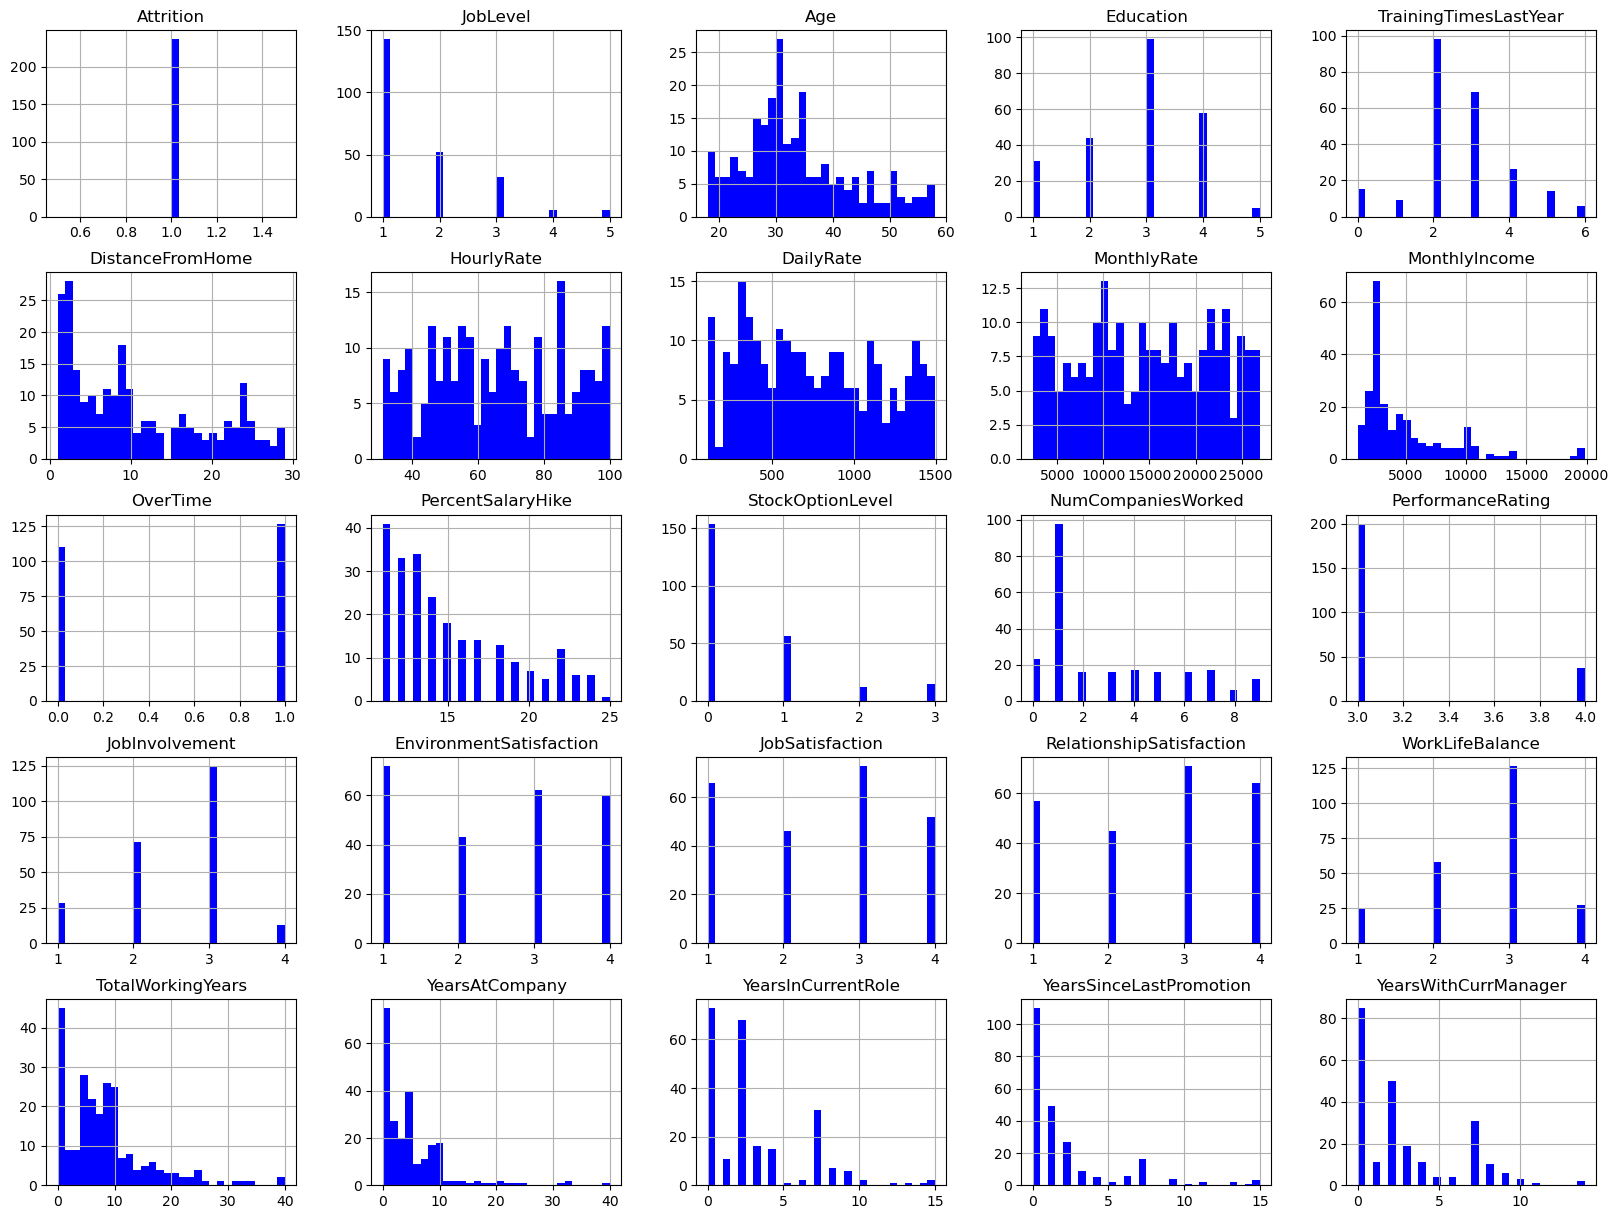

In [21]:
# Визуализация распределения числовых параметров
yes_1.hist(bins = 30, figsize = (20,15), color = 'b');

*Вывод по числовым параметрам*
<details>
<summary><b> нажмите, чтобы развернуть</b></summary>

| Параметр | Описание |
|--------------------------------|---------------------------------------------|
| Уровень работы (JobLevel) | Чаще всего уходят люди первого уровня, чем выше уровень, тем меньше увольнений |
| Возраст (Age) | Сотрудники в возрастном диапазоне от 25 до 35 лет более склонны к смене работы. После 40 лет - увольнения постепенно снижаеются |
|Уровень образования (Education) | Чаше остальных увольняются работники с образованием бакалавриат, чуть меньше – магистратура|
| Количество часов обучения в прошлом году (TrainingTimesLastYear) | Больше всего уволенных прошли среднее количество часов обучения |
|Расстояние от дома до работы (DistanceFromHome) | Большинство уволенных проживают в непосредственной близости от места работы |
| Почасовая, дневная и ежемесячная ставки оплаты труда (HourlyRate, DailyRate, MonthlyRate)|Наблюдается нелинейная зависимость. Требуется более детальное исследование параметров|
 |Ежемесячный доход (MonthlyIncome) | Чем выше доход сотрудника, тем реже происходят увольнения|
| Переработи (OverTime)|Те у кого есть переработка увольняются чаще|
| Процент повышения заработных плат (PercentSalaryHike) и бонусы (StockOptionLevel) | Большинство уволенных сотрудников – это люди, не получавшие процентов и бонусов |
| Количество предыдущих мест работы (NumCompaniesWorked)| Большинство увольнений отмечается среди сотрудников, для которых данная компания является вторым местом работы|
| Рейтинг производительности (PerformanceRating)| Среди уволенных сотрудников люди с уровнем «отличный» и «превосходный»|
| Вовлеченности в работу (JobInvolvement) | Чем выше вовлеченность сотрудников в работу, тем больше отмечается увольнений |
| Удовлетворенности условиями работы (EnvironmentSatisfaction) | Люди с низкой удовлетворенностью увольняются немного чаще остальных групп |
| Удовлетворенности работой (JobSatisfaction), отношениями (RelationshipSatisfaction) и балансом (WorkLifeBalance) | Пик увольнений на «высоком» уровне. Вероятно респонденты давали социально ожидаемые ответы |
| Общий стаж работы (TotalWorkingYears) | Чем меньше стаж, тем больше увольнений|
| Количество лет в текущей компании (YearsAtCompany) | Чем меньше стаж в текущей компании, тем больше увольнений|
| Количество лет в текущей должности (YearsInCurrentRole) | Чем меньше стаж, тем больше увольнений|
| Количество лет с последнего повышения (YearsSinceLastPromotion) | Чем меньше лет, тем больше увольнений|
| Количеств лет с текущим менеджером (YearsWithCurrManager)| Чем меньше лет, тем больше увольнений|

Основные причины увольнений — низкий доход, отсутствие карьерного роста, перегрузки и слабая адаптация молодых сотрудников
</details>

*Анализ по категориальным параметрам по уволенным*

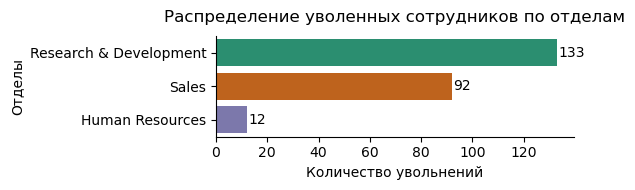

In [24]:
# по отделам
dismissed_by_dept = (
    yes_1.groupby('Department')['Attrition']
    .count()
    .reset_index()
    .sort_values('Attrition', ascending=False)
)
plt.figure(figsize=(6, 2))
ax = sns.barplot(
    data=dismissed_by_dept,
    x='Attrition',
    y='Department',
    palette='Dark2'
)
# Добавляем значения на столбцы
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 0.5,
        p.get_y() + p.get_height()/2,
        f'{int(width)}',
        va='center', ha='left'
    )
plt.title('Распределение уволенных сотрудников по отделам', pad=10)
plt.xlabel('Количество увольнений')
plt.ylabel('Отделы')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

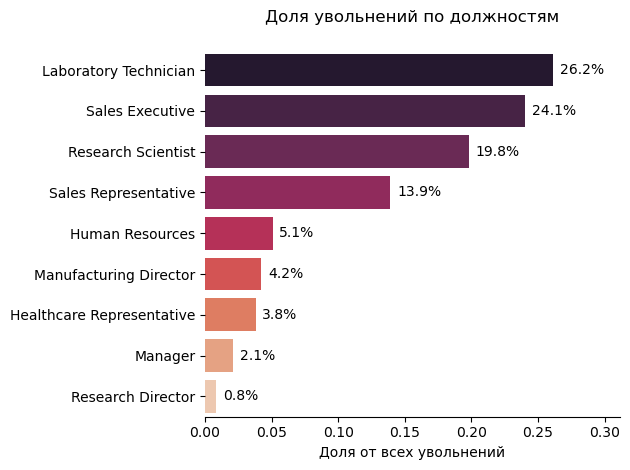

In [26]:
# по должностям
job_role = (
    yes_1.groupby(['JobRole'])[['Attrition']].agg({
    'Attrition': 'count'
    }).reset_index()
    .assign(Attrition_proportion=lambda x: x['Attrition'] / x['Attrition'].sum())
)
dismissed_sorted = job_role.sort_values('Attrition_proportion', ascending=False)
ax = sns.barplot(data=dismissed_sorted,
                 x='Attrition_proportion',
                 y='JobRole',
                 palette='rocket')
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.005,
             p.get_y() + p.get_height()/2.,
             '{:1.1%}'.format(width),
             ha='left',
             va='center')
plt.title('Доля увольнений по должностям', pad=20)
plt.xlabel('Доля от всех увольнений')
plt.ylabel('')
plt.xlim(0, dismissed_sorted['Attrition_proportion'].max() + 0.05)
sns.despine(left=True)
plt.tight_layout()
plt.show()

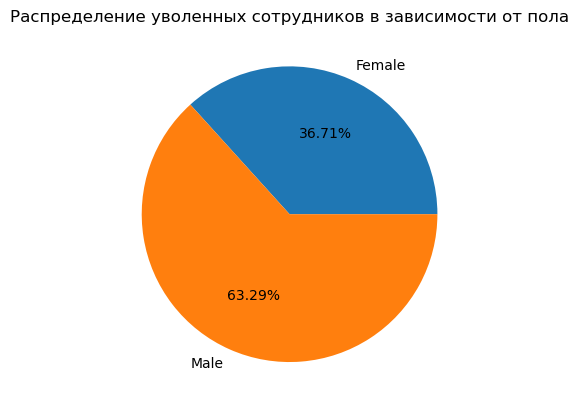

In [27]:
# по гендеру
dismissed_Gender = (
    yes_1.groupby(['Gender']).agg({
    'Attrition': 'count'
    }).reset_index()
    .assign(proportion=lambda x: x['Attrition'] / x['Attrition'].sum())
)
plt.pie(dismissed_Gender['proportion'], labels=dismissed_Gender['Gender'], autopct='%1.2f%%')
plt.title('Распределение уволенных сотрудников в зависимости от пола')
plt.show()

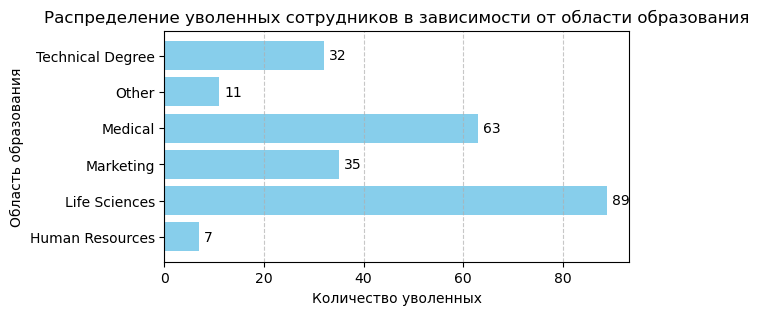

In [28]:
# по области образования
education_counts = yes_1['EducationField'].value_counts().sort_index()
plt.figure(figsize=(6, 3))
plt.barh(education_counts.index, education_counts.values, color='skyblue')
plt.xlabel('Количество уволенных')
plt.ylabel('Область образования')
plt.title('Распределение уволенных сотрудников в зависимости от области образования')
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, v in enumerate(education_counts.values):
    plt.text(v + 1, i, str(v), color='black', va='center')
plt.show()

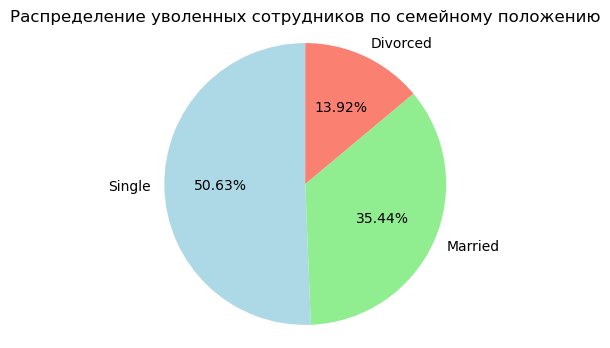

In [29]:
# по семейному положению
marital_status_counts = yes_1['MaritalStatus'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(marital_status_counts,
        labels=marital_status_counts.index,
        autopct='%1.2f%%',
        startangle=90,
        colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('Распределение уволенных сотрудников по семейному положению')
plt.axis('equal')
plt.show()

*Вывод по категориальным параметрам*
<details>
<summary><b> нажмите, чтобы развернуть</b></summary>

| Параметр | Описание |
|--------------------------------|---------------------------------------------|
| Отдел (Department) | Наиболшее количество уволенных в отделе Исследований и разработок, чуть меньше, но всё же значительно в отделе продаж |
| Должность (JobRole) | Наибольшая текучесть кадров наблюдается по должностям лаборант-технолог (26,2%), директор по продажам (24,1%), научный сотрудник (19,8%), торговый представитель (13,9%) |
| Пол (Gender) | Женщины увольняются примерно в два раза реже мужчин |
| Область образования (EducationField) | Абсолютный максимум увольнений Life Sciences (89 увольнений), за ним Medical (63),  Marketing (35) и Technical Degree (32)|
| Семейное положение (MaritalStatus) | Примерно половина уволившихся сотрудников холосты |
</details>

# Сравнение групп уволенных и работающих сотрудников относительно различных параметров

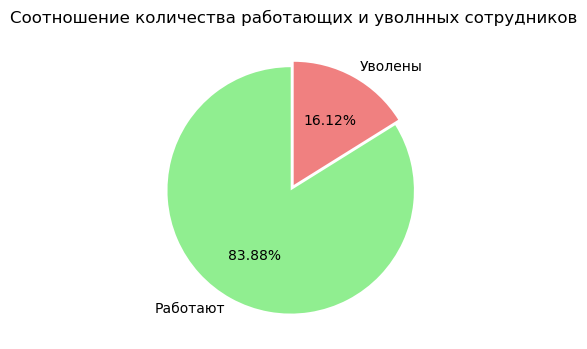

In [30]:
counts = df['Attrition'].value_counts()

plt.figure(figsize=(4, 4)) # Размер
plt.pie(
    counts,
    labels=['Работают', 'Уволены'],  # Подписи
    autopct='%1.2f%%',  # Проценты на диаграмме
    startangle=90,  # Начальный угол
    colors=['lightgreen', 'lightcoral'],  # Цвета
    explode=(0.05, 0)  # Выделение сектора
);

plt.title('Соотношение количества работающих и уволнных сотрудников');

*Вывод по текучести кадров*
<details>
<summary><b> нажмите, чтобы развернуть</b></summary>

*Коэффициент текучести кадров = 16,12.*

В сфере торгово-промышленного производства коэффициент нормы текучести кадров в пределах нормы. Что является показателем стабильного функционирования организации. Для оценки использованы материалы статьи - [ссылка](https://www.moedelo.org/club/kadrovyy-uchet/tekuchest-kadrov)
</details>

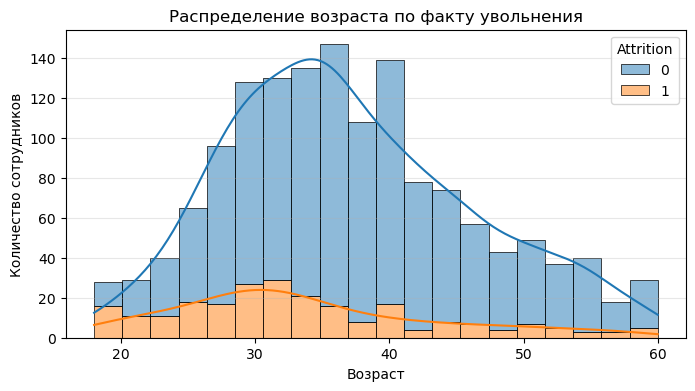

In [31]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', hue='Attrition', bins=20, kde=True, multiple='stack',edgecolor='black', linewidth=0.5)
plt.title('Распределение возраста по факту увольнения')
plt.xlabel('Возраст')
plt.ylabel('Количество сотрудников')
plt.grid(axis='y', alpha=0.3)
plt.show()

*Вывод по возрасту*
<details>
<summary><b> нажмите, чтобы развернуть</b></summary>
На графике видно, что для обеих групп (уволившихся и оставшихся) наибольшая концентрация сотрудников наблюдается в возрасте около 30-40 лет. Это типично для большинства компаний.
</details>

# Анализ с помощью KDE (Kernel Density Estimate)

Применив KDE к данным по уволенным и работающим сотрудникам, проанализируем распределение ключевых показателей и определим, какие факторы оказывают наиболее значимое влияние на увольнение. Это даст четкое понимание взаимосвязей и поможет сделать выводы на основе визуализированных результатов.

In [32]:
df.columns

Index(['Attrition', 'Department', 'JobRole', 'JobLevel', 'BusinessTravel',
       'Age', 'Gender', 'Education', 'EducationField', 'TrainingTimesLastYear',
       'MaritalStatus', 'DistanceFromHome', 'HourlyRate', 'DailyRate',
       'MonthlyRate', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike',
       'StockOptionLevel', 'NumCompaniesWorked', 'PerformanceRating',
       'JobInvolvement', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Для удобства пишем формулу, с помощью которой проведем проверку гипотез по ряду имеющихся показателей относительно уволенных и работающих сотрудников. Таким образом оценим значимость влияния факторов на увольнение.

<details>
<summary><b> ОПИСАНИЕ (нажмите, чтобы развернуть)</b></summary>

*Гипотезы* по показателям будут строиться в соответствии с шаблоном:

Нулевая гипотеза (Н0): между показателями уволенных и работающих нет значимых различий.

Альтернативная гипотеза (Н1): различия между уволенными и работающими имеют разные распределения.
</details>

In [33]:
def plot_kde_distribution(df, x_var, title, xlabel):
    sns.set(style="whitegrid", palette="pastel")
    plt.figure(figsize=(10, 5))

    # Строим график
    sns.kdeplot(
        data=df,
        x=x_var,
        hue='Attrition',
        fill=True,
        common_norm=False,
        alpha=0.5,
        linewidth=1.5
    )

    plt.title(title, pad=20)
    plt.xlabel(xlabel)
    plt.ylabel('Плотность распределения')
    plt.legend(title='Статус', labels=['Уволен', 'Работает'])
    plt.xlim(left=0)
    plt.tight_layout()
    plt.show()

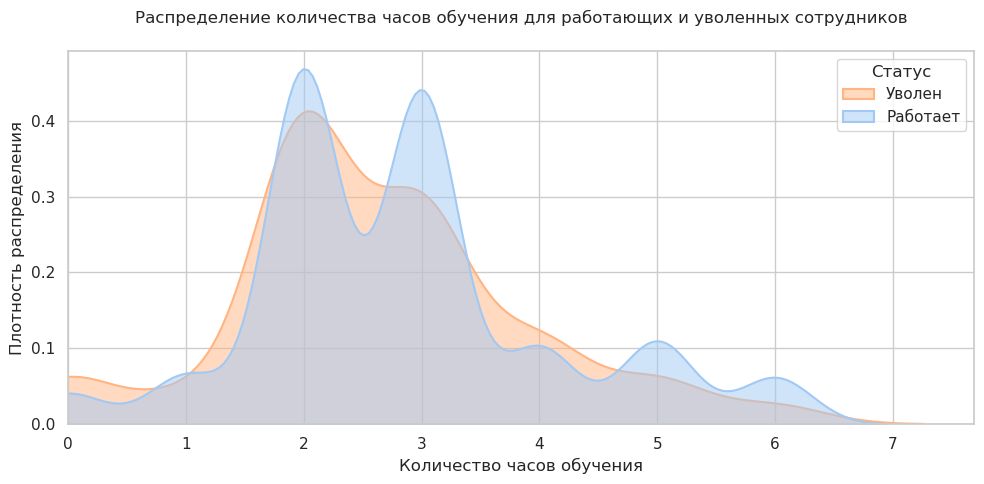

In [34]:
# Влияния количества обучения
plot_kde_distribution(
    df,
    x_var = 'TrainingTimesLastYear',
    title = 'Распределение количества часов обучения для работающих и уволенных сотрудников',
    xlabel = 'Количество часов обучения'
    )

*Вывод относительно влияния количества обучения*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>
Количество часов обучения между уволенными и работающими значимо не различаются.
Однако, стоит отметить, что на графике количество часов обучения для работающих и уволенных сотрудников имеются различия в распределении: у уволенных сотрудников меньшее количество часов обучения по сравнению с работающими
</details>

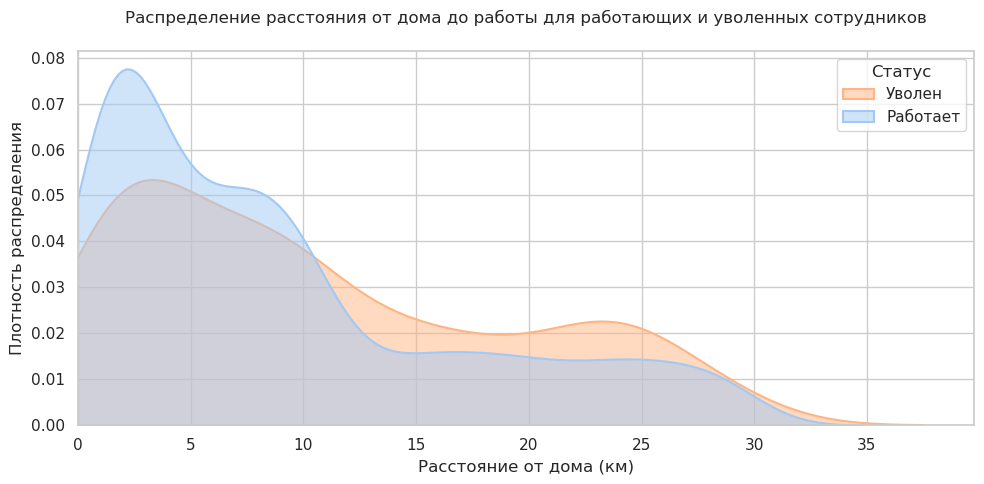

In [35]:
# Влияние удаленности места работы от дома
plot_kde_distribution(
    df,
    x_var = 'DistanceFromHome',
    title = 'Распределение расстояния от дома до работы для работающих и уволенных сотрудников',
    xlabel = 'Расстояние от дома (км)'
    );

*Вывод относительно влияния удаленности места работы от дома*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>
Расстояние от дома до работы статистически значимо связано с увольнениями. Стоит рассмотреть введение мер поддержки, которые сделают данный показатель менее значимым:  гибкий график, частичную удалёнку или компенсацию транспортных расходов
</details>

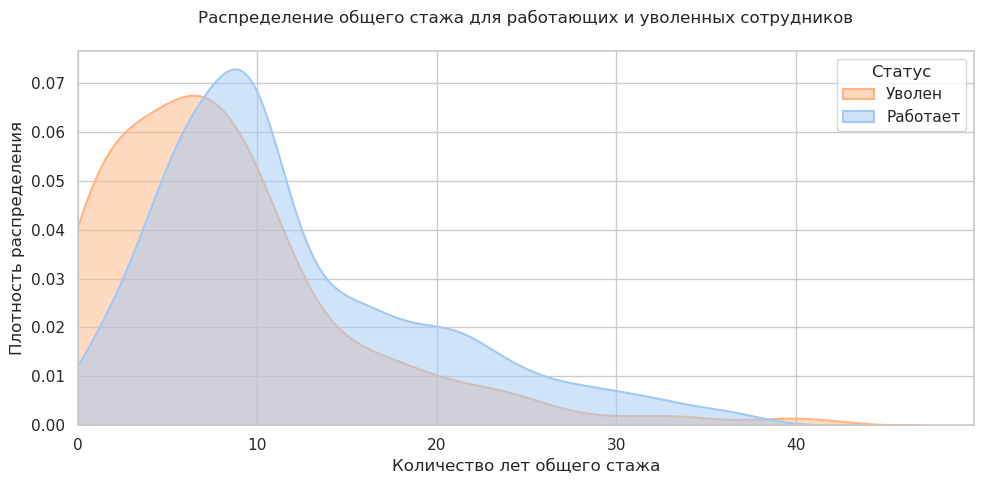

In [36]:
# Влияние общего стажа
plot_kde_distribution(
    df,
    x_var = 'TotalWorkingYears',
    title = 'Распределение общего стажа для работающих и уволенных сотрудников',
    xlabel = 'Количество лет общего стажа'
    );

*Вывод относительно влияния общего стажа*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>

Общий стаж является значимым фактором текучести кадров.
Можно выделить различия в распределении стажа:

-	работающие сотрудники демонстрируют более равномерное распределение с пиками на определенных значениях стажа, что может указывать на группы с высокой лояльностью (например, сотрудники с 5–10 годами стажа).

-	уволенные сотрудники чаще имеют либо очень малый стаж (0–3 года), либо, наоборот, значительный (15+ лет). Это может говорить о двух ключевых группах риска:

  -	новички — возможно, недостаточная адаптация или несоответствие ожиданиям.

  -	опытные сотрудники — вероятно, связан с выгоранием, отсутствием карьерного роста или изменением условий работы.

</details>

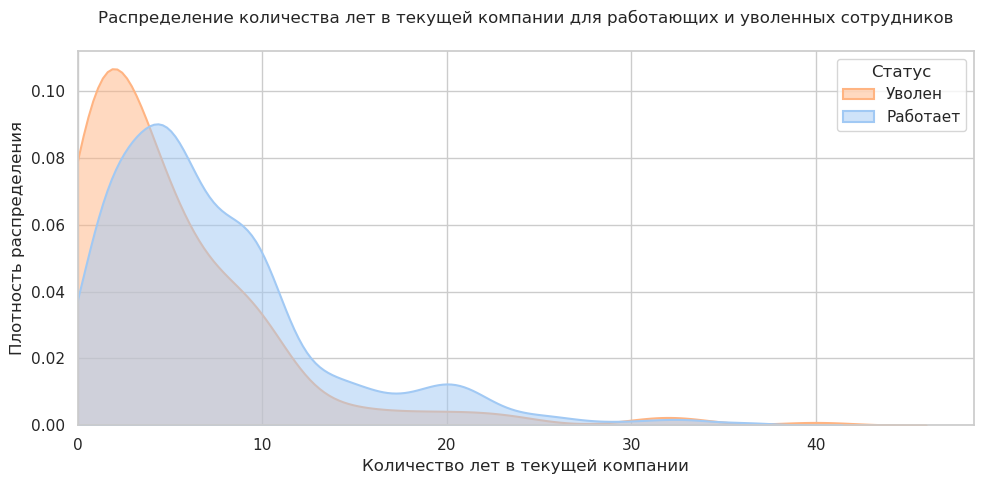

In [37]:
# Влияние стажа в текущей компании
plot_kde_distribution(
    df,
    x_var = 'YearsAtCompany',
    title = 'Распределение количества лет в текущей компании для работающих и уволенных сотрудников',
    xlabel = 'Количество лет в текущей компании'
    );

*Вывод относительно влияния стажа в текущей компании*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>

Количество лет в текущей компании является значимым фактором текучести кадров:
  -	для уволенных сотрудников наблюдается явный пик в первые 1-3 года работы в компании. Это указывает на наиболее высокий риск увольнения в начальный период.
  -	для работающих сотрудников распределение более равномерное с небольшими пиками на определенных сроках работы (возможно, 5-7 лет), что может свидетельствовать о периодах повышенной лояльности
</details>

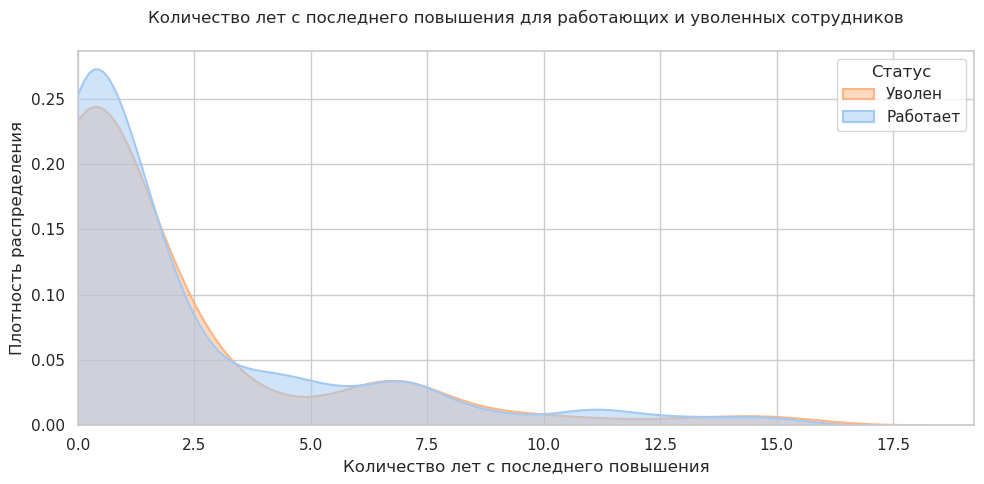

In [39]:
# Влияние периода с последнего повышения
plot_kde_distribution(
    df,
    x_var = 'YearsSinceLastPromotion',
    title = 'Количество лет с последнего повышения для работающих и уволенных сотрудников',
    xlabel = 'Количество лет с последнего повышения'
    );

*Вывод относительно влияния периода с последнего повышения*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>
Количество лет с последнего повышения различается статистически не значимо
</details>

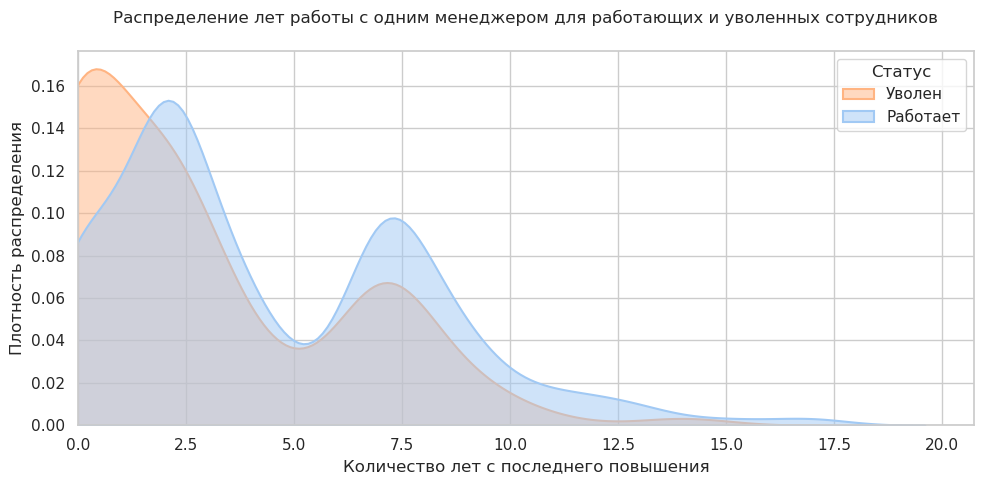

In [40]:
# Влияние работы с одним менеджером
plot_kde_distribution(
    df,
    x_var = 'YearsWithCurrManager',
    title = 'Распределение лет работы с одним менеджером для работающих и уволенных сотрудников',
    xlabel = 'Количество лет с последнего повышения'
    );

*Вывод относительно влияния работы с одним менеджером*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>

Количество лет с одним менеджером является значимым фактором текучести кадров:

  - пик увольнений наблюдается в первые 1-3 года работы с одним руководителем;
  - работающие сотрудники демонстрируют более равномерное распределение с двумя выраженными пиками:
    -	первый пик: 0,5-2 года (период адаптации к менеджеру);
    -	второй пик: 5-7 лет (стабильные рабочие отношения);
    -	после 7 лет работы с одним менеджером количество увольнений существенно снижается.
</details>

# Анализ сотрудников в процентном и долевом отношениях

*Для удобства создана формула позволяющая анализировать сотрудников в сравнении уволенных и работающих по интересующим параметрам в процентах и долях. Дополнительно в функцию заложена возможность применения различных метрик и фильтрации. В Pivot-версии - опция сортировки по убыванию по количеству уволенных. А так же, в виде шаблонов, прописаны варианты использования формулы (запросов)*

In [43]:
def calculate_attrition_stats(
    df,
    group_columns,
    attrition_col = 'Attrition',
    metrics = {'count': ('size', None)},
    add_percent = True,
    filters = None,
    pivot_attrition = False,
    sort_by_diff=False,
    sort_metric = None, # метрика для сортировки (если None - первая метрика из словаря)
    ascending = False, # cортировка по убыванию (True - по возрастанию)
    diff_as_share=True # diff = доля_0 - доля_1 (False: Attrition1 - Attrition0)
):
    # Фильтрация данных
    if filters:
        mask = pd.Series(True, index=df.index)
        for col, value in filters.items():
            if callable(value):
                mask &= df[col].apply(value)
            else:
                mask &= (df[col] == value)
        df = df[mask].copy()
    # Группировка и агрегация
    agg_dict = {}
    for metric_name, (col, func) in metrics.items():
        if col == 'size':
            # Особый случай: подсчёт количества строк
            df_grouped = df.groupby(group_columns + [attrition_col]).size().reset_index(name=metric_name)
        else:
            # Обычные метрики (mean, sum и т.д.)
            agg_dict[metric_name] = (col, func)
    if agg_dict:  # Если есть обычные метрики
        if 'count' in metrics:  # Добавляем count отдельно, если он есть
            count_df = df.groupby(group_columns + [attrition_col]).size().reset_index(name='count')
            main_df = df.groupby(group_columns + [attrition_col]).agg(**agg_dict).reset_index()
            df_grouped = pd.merge(count_df, main_df, on=group_columns + [attrition_col])
        else:
            df_grouped = df.groupby(group_columns + [attrition_col]).agg(**agg_dict).reset_index()
    else:
        # Только count (size)
        df_grouped = df.groupby(group_columns + [attrition_col]).size().reset_index(name='count')
    # Расчёт долей
    for metric in metrics.keys():
        total_col = f'{metric}_total'
        share_col = f'{metric}_share'
        df_grouped[total_col] = df_grouped.groupby(group_columns)[metric].transform('sum')
        df_grouped[share_col] = df_grouped[metric] / df_grouped[total_col]
        if add_percent:
            df_grouped[f'{share_col}_pct'] = df_grouped[share_col] * 100
    # Удаляем временные колонки total
    df_grouped.drop(columns=[c for c in df_grouped.columns if c.endswith('_total')], inplace=True)
    # Pivot-режим с сортировкой
    if pivot_attrition:
        df_pivot = df_grouped.pivot(
            index=group_columns,
            columns=attrition_col,
            values=[m for m in metrics.keys()] + [f'{m}_share' for m in metrics.keys()] if add_percent else []
        )
        df_pivot.columns = [f'{col[0]}_{col[1]}' for col in df_pivot.columns]
        df_pivot.reset_index(inplace=True)
        #  Расчет diff и c ортировка по разнице
        if sort_by_diff:
            sort_metric = sort_metric or list(metrics.keys())[0]
            col_0 = f'{sort_metric}_share_0' if diff_as_share else f'{sort_metric}_0'
            col_1 = f'{sort_metric}_share_1' if diff_as_share else f'{sort_metric}_1'
            if col_0 in df_pivot.columns and col_1 in df_pivot.columns:
                df_pivot['diff'] = df_pivot[col_0] - df_pivot[col_1] # Доля_0 - Доля_1
                df_pivot = df_pivot.sort_values(by='diff', ascending=ascending)
        return df_pivot
    return df_grouped

In [44]:
df.columns

Index(['Attrition', 'Department', 'JobRole', 'JobLevel', 'BusinessTravel',
       'Age', 'Gender', 'Education', 'EducationField', 'TrainingTimesLastYear',
       'MaritalStatus', 'DistanceFromHome', 'HourlyRate', 'DailyRate',
       'MonthlyRate', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike',
       'StockOptionLevel', 'NumCompaniesWorked', 'PerformanceRating',
       'JobInvolvement', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [45]:
# Шаблон 1 - Подсчёт количества сотрудников в процентах
result = calculate_attrition_stats(
    df,
    group_columns=['Department', 'Gender'],
)
result

,Department,Gender,Attrition,count,count_share,count_share_pct
0,Human Resources,Female,0,14,0.70,70.00
1,Human Resources,Female,1,6,0.30,30.00
2,Human Resources,Male,0,37,0.86,86.05
3,Human Resources,Male,1,6,0.14,13.95
4,Research & Development,Female,0,336,0.89,88.65
5,Research & Development,Female,1,43,0.11,11.35
6,Research & Development,Male,0,492,0.85,84.54
7,Research & Development,Male,1,90,0.15,15.46
8,Sales,Female,0,151,0.80,79.89
9,Sales,Female,1,38,0.20,20.11


In [46]:
# Шаблон 2 - Подсчёт количества сотрудников с разницей между работающими и уволенными в доях
result = calculate_attrition_stats(
    df,
    group_columns=['Department', 'Gender'],
    metrics={'count': ('size', None)},
    pivot_attrition=True,
    sort_by_diff=True,
    diff_as_share=True,
    ascending=False
    )
result[['Department', 'Gender', 'count_share_0', 'count_share_1', 'diff']]

,Department,Gender,count_share_0,count_share_1,diff
2,Research & Development,Female,0.89,0.11,0.77
1,Human Resources,Male,0.86,0.14,0.72
3,Research & Development,Male,0.85,0.15,0.69
4,Sales,Female,0.80,0.20,0.60
5,Sales,Male,0.79,0.21,0.58
0,Human Resources,Female,0.70,0.30,0.40


In [47]:
# Шаблон 3 - Подсчёт количества сотрудников с несколькими выбранными метриками
result = calculate_attrition_stats(
    df,
    group_columns=['Department', 'JobRole'],
    metrics={
        'count': ('size', None), # Количество сотрудников
        'avg_age': ('Age', 'mean'),
        'median_salary': ('MonthlyIncome', 'median')
    }
  )
result

,Department,JobRole,Attrition,count,avg_age,median_salary,count_share,count_share_pct,avg_age_share,avg_age_share_pct,median_salary_share,median_salary_share_pct
0,Human Resources,Human Resources,0,40,37.12,3668.50,0.77,76.92,0.55,55.24,0.58,58.04
1,Human Resources,Human Resources,1,12,30.08,2652.50,0.23,23.08,0.45,44.76,0.42,41.96
2,Human Resources,Manager,0,11,48.73,18844.00,1.00,100.00,1.00,100.00,1.00,100.00
3,Research & Development,Healthcare Representative,0,122,39.88,6768.00,0.93,93.13,0.51,50.63,0.44,43.69
4,Research & Development,Healthcare Representative,1,9,38.89,8722.00,0.07,6.87,0.49,49.37,0.56,56.31
5,Research & Development,Laboratory Technician,0,197,34.94,3068.00,0.76,76.06,0.53,52.67,0.54,54.10
6,Research & Development,Laboratory Technician,1,62,31.40,2603.00,0.24,23.94,0.47,47.33,0.46,45.90
7,Research & Development,Manager,0,51,46.02,17665.00,0.94,94.44,0.51,50.56,0.56,56.48
8,Research & Development,Manager,1,3,45.00,13610.00,0.06,5.56,0.49,49.44,0.44,43.52
9,Research & Development,Manufacturing Director,0,135,38.22,6447.00,0.93,93.10,0.49,49.30,0.49,48.62


In [48]:
# Шаблон 4 - Pivot-версия с разницей в долях
result_pivot = calculate_attrition_stats(
    df,
    group_columns=['TrainingTimesLastYear'],
    pivot_attrition=True,
    sort_by_diff=True
)
result_pivot

,TrainingTimesLastYear,count_0,count_1,count_share_0,count_share_1,diff
6,6,59.00,6.00,0.91,0.09,0.82
5,5,105.00,14.00,0.88,0.12,0.76
1,1,62.00,9.00,0.87,0.13,0.75
3,3,422.00,69.00,0.86,0.14,0.72
2,2,449.00,98.00,0.82,0.18,0.64
4,4,97.00,26.00,0.79,0.21,0.58
0,0,39.00,15.00,0.72,0.28,0.44


In [49]:
# Шаблон 5 - Pivot-версия с заданной метрикой и разницей в долях по количеству сотрудников
result = calculate_attrition_stats(
    df,
    group_columns=['TrainingTimesLastYear'],
    metrics={'count': ('size', None), 'avg_age': ('Age', 'mean')},
    pivot_attrition=True,
    sort_by_diff=True
)
result

,TrainingTimesLastYear,count_0,count_1,avg_age_0,avg_age_1,count_share_0,count_share_1,avg_age_share_0,avg_age_share_1,diff
6,6,59.00,6.00,35.07,30.67,0.91,0.09,0.53,0.47,0.82
5,5,105.00,14.00,37.08,28.93,0.88,0.12,0.56,0.44,0.76
1,1,62.00,9.00,38.31,34.89,0.87,0.13,0.52,0.48,0.75
3,3,422.00,69.00,38.01,32.94,0.86,0.14,0.54,0.46,0.72
2,2,449.00,98.00,37.07,34.02,0.82,0.18,0.52,0.48,0.64
4,4,97.00,26.00,39.14,36.65,0.79,0.21,0.52,0.48,0.58
0,0,39.00,15.00,38.23,33.47,0.72,0.28,0.53,0.47,0.44


In [50]:
# Дополнение к шаблону 6 - Фильтрация рисковых групп:
risk_groups = result[result['diff'] < 0]  # Где уволенные преобладают
risk_groups

,TrainingTimesLastYear,count_0,count_1,avg_age_0,avg_age_1,count_share_0,count_share_1,avg_age_share_0,avg_age_share_1,diff


In [51]:
# Шаблон 7 - Фильтрация (например, мужчины старше 30 лет)
result_filtered = calculate_attrition_stats(
    df,
    group_columns=['Department'],
    filters={'Gender': 'Male', 'Age': lambda x: x > 30}
)
result_filtered

,Department,Attrition,count,count_share,count_share_pct
0,Human Resources,0,30,0.91,90.91
1,Human Resources,1,3,0.09,9.09
2,Research & Development,0,369,0.87,87.44
3,Research & Development,1,53,0.13,12.56
4,Sales,0,152,0.81,81.28
5,Sales,1,35,0.19,18.72


# Корреляционная матрица

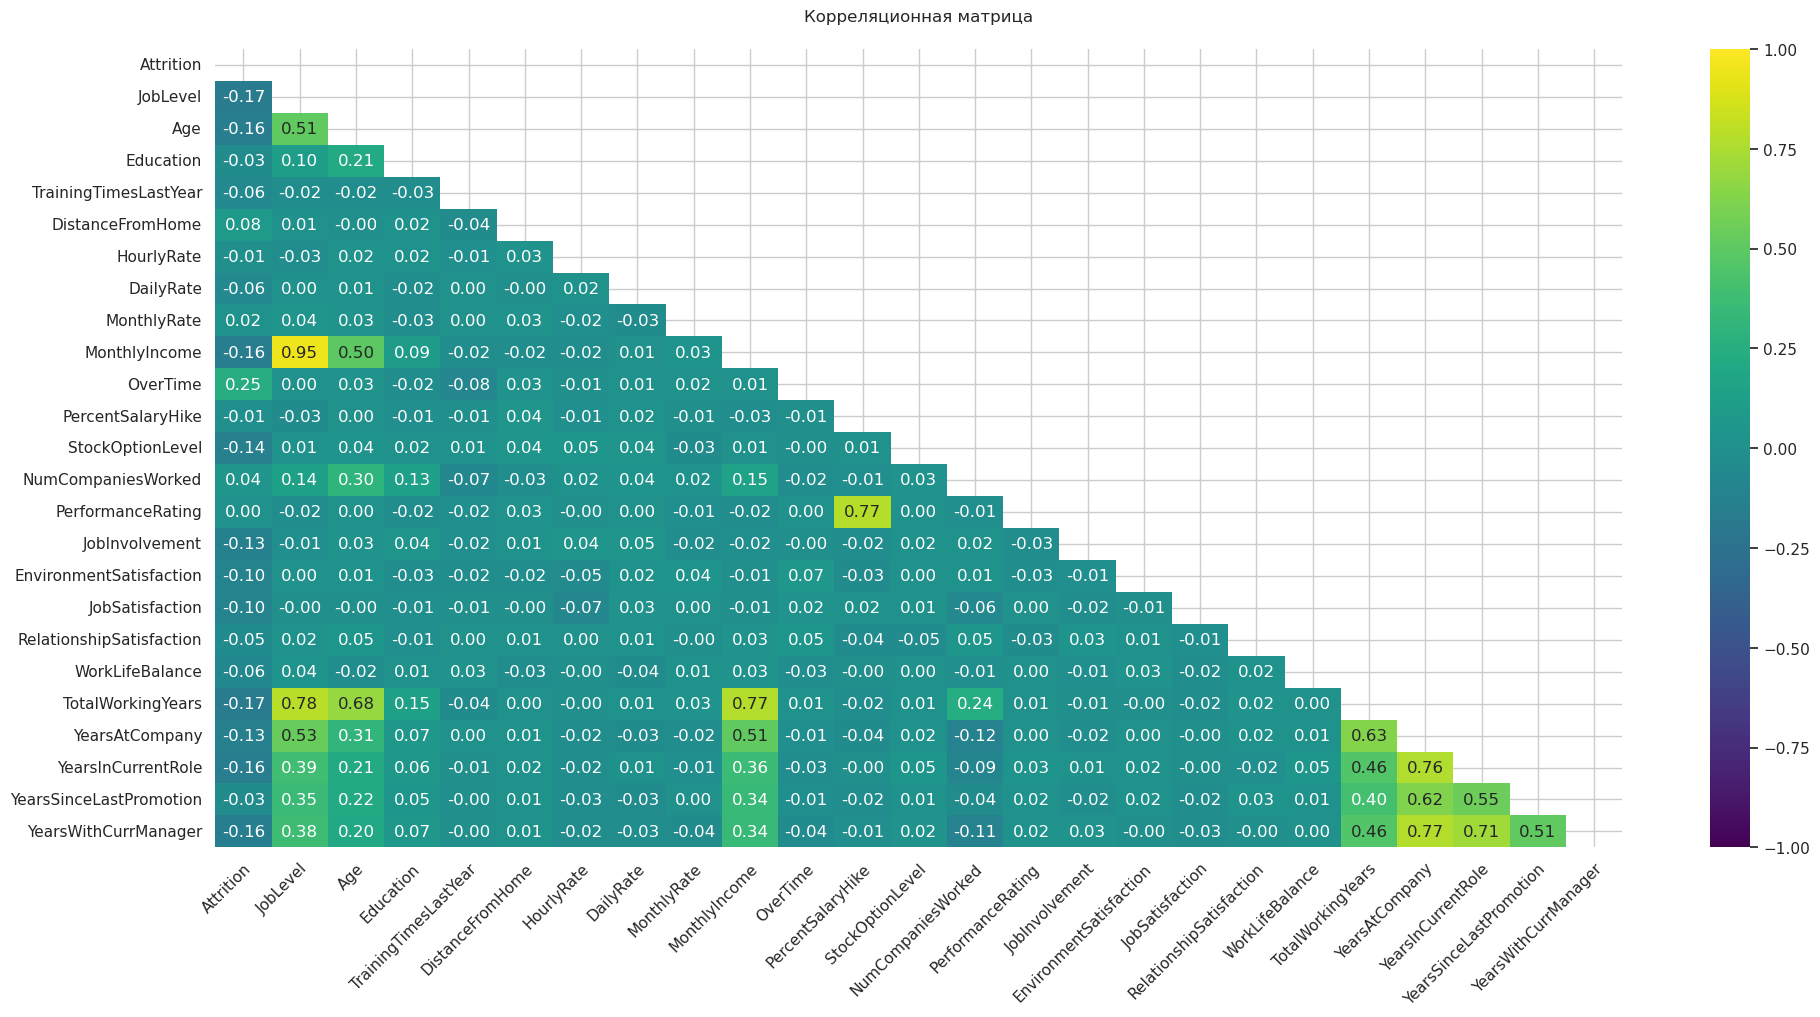

In [52]:
numeric_features = df.select_dtypes(include=[np.number])
correlations = np.triu(numeric_features.corr())
f, ax = plt.subplots(figsize=(20, 10))
# Создаем heatmap
sns.heatmap(numeric_features.corr(), annot=True, mask=correlations, vmin=-1, vmax=1, cmap='viridis', fmt='.2f', ax=ax, xticklabels=numeric_features.columns, yticklabels=numeric_features.columns)
# Поворачиваем подписи оси X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
# Добавляем отступ для подписей, чтобы они не обрезались
plt.tight_layout()
plt.title("Корреляционная матрица", pad=20)
plt.show()

*Вывод по корреляции параметров*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>

В данном датасете установлен ряд зависимостей (положительная корреляция) между:

«Уровнем работы» и «Ежемесячным доходом» - 0,95 – *очень высокая корреляция*;

*высокая корреляция* между:
  - «Общим стажем работы» и «Уровня работы» - 0,78;
  - «Общим стажем работы» и «Ежемесячным доходом» - 0,77;
  - «Рейтинг производительности» и «Процентом повышения зарплаты» - 0,77;

*средняя корреляция* между:
  - «Количеством лет в компании» и «Уровнем работы» - 0,53;
  - «Возрастом» и «Уровнем работы» - 0,51;
  - «Ежемесячным доходом» и «Возрастом» - 0,50;
  - «Количеством лет в компании» и «Ежемесячным доходом» - 0,51

</details>

# **Моделирование**

# Модель машинного обучения. Логистическая регрессия

In [54]:
df_0.head(3)

,Attrition,Department,JobRole,JobLevel,BusinessTravel,Age,Gender,Education,EducationField,TrainingTimesLastYear,MaritalStatus,DistanceFromHome,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,OverTime,PercentSalaryHike,StockOptionLevel,NumCompaniesWorked,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Sales,Sales Executive,2,Travel_Rarely,41,Female,2,Life Sciences,0,Single,1,94,1102,19479,5993,Yes,11,0,8,3,3,2,4,1,1,8,6,4,0,5
1,No,Research & Development,Research Scientist,2,Travel_Frequently,49,Male,1,Life Sciences,3,Married,8,61,279,24907,5130,No,23,1,1,4,2,3,2,4,3,10,10,7,1,7
2,Yes,Research & Development,Laboratory Technician,1,Travel_Rarely,37,Male,2,Other,3,Single,2,92,1373,2396,2090,Yes,15,0,6,3,2,4,3,2,3,7,0,0,0,0


In [55]:
# Определяем категориальные столбцы
categorical_cols = df_0.select_dtypes(include=['object']).columns
categorical_cols

# Применяем прямое кодирование с drop_first=True
df_encoded = pd.get_dummies(df_0, columns=categorical_cols, drop_first=True)

# Определяем числовые столбцы (исключая целевую переменную «Attrition», поскольку она уже закодирована)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Инициализируем масштабировщик
scaler = StandardScaler()

# Применяем масштабирование
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded.head(3)

,JobLevel,Age,Education,TrainingTimesLastYear,DistanceFromHome,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,PercentSalaryHike,StockOptionLevel,NumCompaniesWorked,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,-0.06,0.45,-0.89,-2.17,-1.01,1.38,0.74,0.73,-0.11,-1.15,-0.93,2.13,-0.43,0.38,-0.66,1.15,-1.58,-2.49,-0.42,-0.16,-0.06,-0.68,0.25,True,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,True
1,-0.06,1.32,-1.87,0.16,-0.15,-0.24,-1.30,1.49,-0.29,2.13,0.24,-0.68,2.35,-1.03,0.25,-0.66,1.19,0.34,-0.16,0.49,0.76,-0.37,0.81,False,True,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,False,False,True,False,False
2,-0.96,0.01,-0.89,0.16,-0.89,1.28,1.41,-1.67,-0.94,-0.06,-0.93,1.32,-0.43,-1.03,1.17,0.25,-0.66,0.34,-0.55,-1.14,-1.17,-0.68,-1.16,True,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True,True


In [56]:
# Загрузка и подготовка данных
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [57]:
# Разделение на признаки и целевую переменную
X = df_encoded.drop(columns=['Attrition_Yes'])
y = df_encoded['Attrition_Yes']

# Разделение на тренировочную и тестовую выборки (например, 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Обучение модели
log_reg = LogisticRegression(max_iter=1000)  # max_iter для предотвращения сходимости
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [59]:
# Предсказания
y_pred = log_reg.predict(X_test)
# Вероятности для ROC-AUC
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Оценка accuracy на тренировочных и тестовых данных
train_accuracy = accuracy_score(y_train, log_reg.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Получаем полный отчет по метрикам
class_report = classification_report(y_test, y_pred, output_dict=True, digits=2)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Создаем DataFrame для отображения результатов
metrics_df = pd.DataFrame({
    "Metric": ["Train Accuracy", "Test Accuracy",
               "Precision (class 1)", "Recall (class 1)", "F1 (class 1)",
               "ROC-AUC Score"],
    "Value": [train_accuracy, test_accuracy,
              class_report['True']['precision'], class_report['True']['recall'], class_report['True']['f1-score'],
              roc_auc]
}).round(2)

# Вывод confusion matrix и classification report
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=2))

metrics_df

Confusion Matrix:
 [[244  11]
 [ 22  17]]

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.96      0.94       255
        True       0.61      0.44      0.51        39

    accuracy                           0.89       294
   macro avg       0.76      0.70      0.72       294
weighted avg       0.88      0.89      0.88       294



,Metric,Value
0,Train Accuracy,0.89
1,Test Accuracy,0.89
2,Precision (class 1),0.61
3,Recall (class 1),0.44
4,F1 (class 1),0.51
5,ROC-AUC Score,0.80


*Оценка качества прогнозной модели логистической регрессии*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>

**Accuracy (Точность)** – модель корректно предсказывает 89% случаев. Однако, при дисбалансе классов (например, мало увольнений) accuracy может вводить в заблуждение.

Классы распределены неравномерно:
•	False (класс 0) — 255 примеров,
•	True (класс 1) — 39 примеров.

Это влияет на метрики для класса True, так как модель склонна лучше предсказывать доминирующий класс.

**Precision (Точность предсказаний)** – из всех предсказанных увольнений 61% действительно были увольнениями. Это означает, что модель часто ошибается, предсказывая True (ложные срабатывания).

**Recall (Полнота)** – модель обнаруживает только 44% реальных увольнений, что указывает на высокую долю пропущенных случаев (FN).

**F1 Score** – гармоническое среднее precision и recall. Низкое значение F1 указывает на дисбаланс между точностью и полнотой.

**ROC-AUC Score** - AUC показывает хорошую способность модели разделять классы, т.е. модель имеет хорошую предсказательную способность, но не идеальную. Это согласуется с низким recall для True.

**Train** и **Test Accuracy** совпадают (89%), что указывает на отсутствие переобучения. Однако это может быть связано с доминированием класса False.

**Итог:** Модель хорошо предсказывает класс False, но плохо справляется с классом True.
</details>

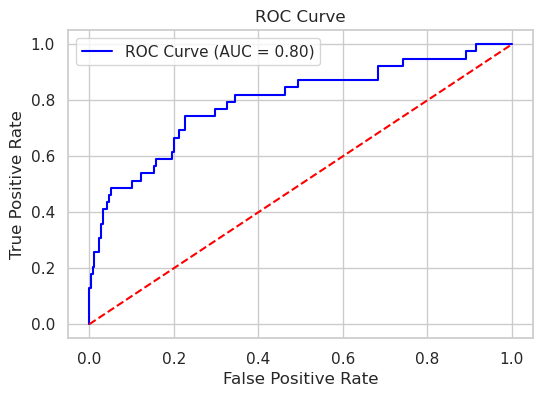

In [60]:
# Считаем ROC-кривую
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Строим ROC-кривую
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.show()

*Описание ROC-кривой AUC*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>
Результат ROC-кривой AUC (Area Under the Curve) равное 0,80 указывает на то, что модель имеет высокую предсказательную силу, так как значение близко к 1,0 (идеальный классификатор)
</details>

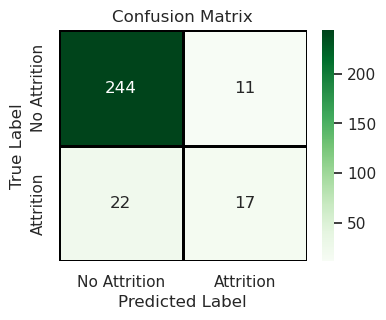

In [61]:
# Строим матрицу неточностей
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'], linewidths=1, linecolor='black')

# Метки и название
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

*Описание Матрицы неточностей*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>

True Negative (TN): 244 (корректные предсказания отсутствия увольнения);

False Positive (FP): 11 (ошибочные предсказания увольнения);

False Negative (FN): 22 (ошибочные предсказания отсутствия увольнения);

True Positive (TP): 17 (корректные предсказания увольнения)
</details>

**Итог:** Модель имеет приемлемое качество, но требует доработки для снижения количества пропущенных увольнений (улучшение recall).

In [62]:
# Важность признаков топ-5
importances = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values('Coefficient', ascending=False)
importances.head()

,Feature,Coefficient
43,OverTime_Yes,2.03
33,BusinessTravel_Travel_Frequently,1.46
26,JobRole_Laboratory Technician,1.39
42,MaritalStatus_Single,1.18
32,JobRole_Sales Representative,0.85


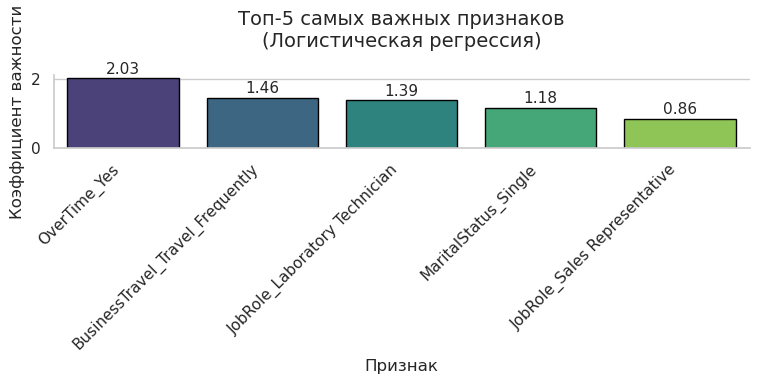

In [64]:
# Альтернатива - вертикальные столбцы
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
plot = sns.barplot(
    y='Coefficient',
    x='Feature',
    data=importances,
    palette='viridis',
    edgecolor='black'
)
plt.xticks(rotation=45, ha='right')
plt.title('Топ-5 самых важных признаков\n(Логистическая регрессия)',
          fontsize=14, pad=20)
plt.ylabel('Коэффициент важности', fontsize=12)
plt.xlabel('Признак', fontsize=12)

# Добавляем значения на столбцы
for i, p in enumerate(plot.patches):
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', va='bottom', fontsize=11)

sns.despine()
plt.tight_layout()
plt.show()

*Топ-5 наиболее важных признаков для увольнений*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>

**Сверхурочная работа (OverTime_Yes**) – самый значимый фактор. Сотрудники, работающие сверхурочно чаще увольняются

**Частые командировки (BusinessTravel_Travel_Frequently)** – второй по важности фактор. Регулярные разъезды повышают риск ухода, вероятно, из-за усталости или дисбаланса работы и личной жизни

**Должность "Лаборант" (JobRole_Laboratory Technician)** – третий ключевой фактор. Специалисты в лабораториях уходят чаще других. Возможные причины: низкая зарплата, монотонность работы, недостаток карьерного роста

**Должность "Торговый представитель"(JobRole_Sales Representative)** У сотрудников на этой позиции риск увольнения почти вдвое выше (по сравнению с низкорисковыми группами). Возможные причины: высокий стресс, нестабильный доход, давление KPI

**Холостые сотрудники (MaritalStatus_Single)** Неженатые/незамужние сотрудники увольняются чаще. Возможные причины: меньшая привязанность к месту (легче сменить работу), отсутствие финансовых обязательств (ипотека, семья)

**Итог:** основные драйверы увольнений связаны с перегрузками (сверхурочные, командировки) и специфическими должностями (лаборанты, продажники). Также важна личная ситуация сотрудников (семейное положение)
</details>

**Анализируем вероятности увольнения для работающих сотрудников**

In [65]:
# Получаем вероятности увольнения для всего набора данных
y_proba = log_reg.predict_proba(X)[:, 1]

# Добавляем столбец с вероятностями
df_0.loc[:, 'Attrition_Probability'] = y_proba

# Сортируем сотрудников по риску увольнения
high_risk_employees = df_0.sort_values('Attrition_Probability', ascending=False)
high_risk_employees

,Attrition,Department,JobRole,JobLevel,BusinessTravel,Age,Gender,Education,EducationField,TrainingTimesLastYear,MaritalStatus,DistanceFromHome,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,OverTime,PercentSalaryHike,StockOptionLevel,NumCompaniesWorked,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Probability
463,Yes,Research & Development,Laboratory Technician,1,Travel_Rarely,26,Male,3,Technical Degree,3,Single,24,66,471,23213,2340,Yes,18,0,1,3,1,3,4,2,1,1,1,0,0,0,0.98
357,Yes,Sales,Sales Representative,1,Travel_Frequently,21,Female,1,Technical Degree,3,Single,1,99,756,9150,2174,Yes,11,0,1,3,2,1,2,3,3,3,3,2,1,2,0.97
1060,Yes,Research & Development,Laboratory Technician,1,Travel_Frequently,24,Male,3,Medical,2,Single,9,89,381,16998,3172,Yes,11,0,2,3,3,2,1,3,2,4,0,0,0,0,0.97
911,Yes,Sales,Sales Representative,1,Travel_Frequently,25,Male,1,Life Sciences,4,Single,24,73,599,8040,1118,Yes,14,0,1,3,1,3,4,4,3,1,1,0,1,0,0.95
457,Yes,Sales,Sales Representative,1,Travel_Frequently,18,Male,3,Marketing,3,Single,5,69,1306,8059,1878,Yes,14,0,1,3,3,2,2,4,3,0,0,0,0,0,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,No,Research & Development,Manager,5,Travel_Rarely,53,Female,3,Other,3,Divorced,5,58,1282,10735,19094,No,11,1,4,3,3,3,3,4,2,26,14,13,4,8,0.00
746,No,Research & Development,Research Director,5,Non-Travel,41,Female,1,Life Sciences,3,Divorced,7,55,247,20284,19973,No,22,2,1,4,1,2,3,2,3,21,21,16,5,10,0.00
858,No,Research & Development,Manager,5,Travel_Rarely,53,Female,2,Medical,6,Divorced,7,50,1223,18640,18606,No,18,1,3,3,3,4,3,2,3,26,7,7,4,7,0.00
894,No,Research & Development,Research Director,4,Travel_Rarely,54,Male,3,Life Sciences,2,Married,3,85,685,23474,17779,No,14,0,3,3,3,4,4,1,3,36,10,9,0,9,0.00


In [66]:
# Добавляем колонку с уровнем риска для всего набора данных
df_0.loc[:, 'Risk_Group'] = pd.cut(
    df_0['Attrition_Probability'],
    bins=[0, 0.4, 0.7, 1],
    labels=['Low Risk', 'Medium Risk', 'High Risk'],
    right=False # Чтобы 0.4 попало в Medium Risk, а не Low Risk
)

# Считаем доли и выводим с %
risk_distribution = df_0['Risk_Group'].value_counts(normalize=True).mul(100).round(1)
risk_distribution.head()
print("Распределение по группам риска:")
print(risk_distribution.astype(str) + '%')

Распределение по группам риска:
Risk_Group
Low Risk       85.9%
Medium Risk     9.9%
High Risk       4.1%
Name: proportion, dtype: object


In [67]:
# Группы рисков среди работающих
risk_group_No = df_0.loc[df_0['Attrition'] == 'No']

# Считаем доли и выводим с %
risk_distribution_No = risk_group_No['Risk_Group'].value_counts(normalize=True).mul(100).round(1)

print("Распределение по группам риска для работающих сотрудников:")
print(risk_distribution_No.astype(str) + '%')

Распределение по группам риска для работающих сотрудников:
Risk_Group
Low Risk       94.0%
Medium Risk     5.8%
High Risk       0.2%
Name: proportion, dtype: object


*Вывод по распределению групп риска*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>
Подавляющее большинство сотрудников находятся в зоне низкого риска увольнения. Это говорит о стабильности кадрового состава. Средний и высокий риск охватывают 6% сотрудников. Это доля, требующая внимания.
</details>

In [68]:
# Выводим всех работающих сотрудников находящихся в группе высокого риска
high_risk = df_0.loc[
 (df_0['Risk_Group'] == 'High Risk') & (df_0['Attrition']== 'No')
 ].sort_values('Attrition_Probability', ascending=False) # сортируем по убыванию

row_count = len(high_risk)
print(f"Количество сотрудников в зоне высокого риска увольнения: {row_count}")
print(f"Средняя вероятность увольнения: {high_risk['Attrition_Probability'].mean():.2%}")
print(f"Средний уровень удовлетворенности работой: {high_risk['JobSatisfaction'].mean()}")
high_risk

Количество сотрудников в зоне высокого риска увольнения: 3
Средняя вероятность увольнения: 76.39%
Средний уровень удовлетворенности работой: 3.0


,Attrition,Department,JobRole,JobLevel,BusinessTravel,Age,Gender,Education,EducationField,TrainingTimesLastYear,MaritalStatus,DistanceFromHome,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,OverTime,PercentSalaryHike,StockOptionLevel,NumCompaniesWorked,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Probability,Risk_Group
1086,No,Research & Development,Research Director,4,Travel_Frequently,50,Male,5,Medical,2,Single,22,88,333,24450,14411,Yes,13,0,1,3,1,3,4,4,3,32,32,6,13,9,0.81,High Risk
1436,No,Sales,Sales Representative,1,Travel_Rarely,21,Male,1,Medical,6,Single,5,58,501,25479,2380,Yes,11,0,1,3,3,3,1,4,3,2,2,2,1,2,0.77,High Risk
1168,No,Research & Development,Research Scientist,1,Travel_Frequently,24,Female,1,Technical Degree,2,Single,2,32,567,17218,3760,Yes,13,0,1,3,3,1,4,3,3,6,6,3,1,3,0.72,High Risk


In [69]:
# Отделы в зоне высокого риска среди работающих
print(high_risk['Department'].value_counts())

Department
Research & Development    2
Sales                     1
Name: count, dtype: int64


In [70]:
# Должности в зоне высокого риска среди работающих
print(high_risk['JobRole'].value_counts())

JobRole
Research Director       1
Sales Representative    1
Research Scientist      1
Name: count, dtype: int64


*Вывод по результатам группы с высоким риском увольнения*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>
В отношении данных сотрудников необходимо провести ряд мер направленных на недопощения потери кадров. А именно: провести анализ причин (конфликты, перегрузки, низкая зарплата) и принять индивидуальные меры удержания (например, пересмотр обязанностей, бонусы)</details>

In [71]:
# Выводим всех работающих сотрудников находящихся в группе среднего риска
medium_risk = df_0.loc[
 (df_0['Risk_Group'] == 'Medium Risk') & (df_0['Attrition']== 'No')
 ].sort_values('Attrition_Probability', ascending=False)

row_count_1 = len(medium_risk)
print(f"Количество сотрудников в зоне среднего риска увольнения: {row_count_1}")
print(f"Средняя вероятность увольнения: {medium_risk['Attrition_Probability'].mean():.2%}")
print(f"Средний уровень удовлетворенности работой: {medium_risk['JobSatisfaction'].mean()}")
medium_risk

Количество сотрудников в зоне среднего риска увольнения: 71
Средняя вероятность увольнения: 50.60%
Средний уровень удовлетворенности работой: 2.380281690140845


,Attrition,Department,JobRole,JobLevel,BusinessTravel,Age,Gender,Education,EducationField,TrainingTimesLastYear,MaritalStatus,DistanceFromHome,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,OverTime,PercentSalaryHike,StockOptionLevel,NumCompaniesWorked,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Probability,Risk_Group
54,No,Sales,Sales Executive,2,Travel_Rarely,26,Female,3,Marketing,2,Married,23,47,1443,21436,4157,Yes,19,1,7,3,2,3,4,3,2,5,2,2,0,0,0.69,Medium Risk
673,No,Research & Development,Research Scientist,1,Travel_Rarely,33,Male,4,Other,1,Single,1,100,1198,3339,2799,Yes,11,0,3,3,2,3,1,2,3,6,3,2,0,2,0.69,Medium Risk
921,No,Research & Development,Laboratory Technician,1,Travel_Frequently,28,Male,4,Medical,2,Single,1,44,791,6842,2154,Yes,11,0,0,3,3,4,3,3,2,5,4,2,0,2,0.67,Medium Risk
1142,No,Research & Development,Laboratory Technician,2,Travel_Rarely,45,Female,5,Medical,3,Single,5,50,1015,23447,5769,Yes,14,0,1,3,1,3,1,1,3,10,10,7,1,4,0.66,Medium Risk
496,No,Sales,Sales Representative,1,Travel_Rarely,21,Male,1,Technical Degree,2,Single,22,49,1343,24444,3447,No,11,0,1,3,3,3,3,3,3,3,3,2,1,2,0.65,Medium Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,No,Research & Development,Manufacturing Director,2,Travel_Rarely,41,Male,3,Medical,3,Single,6,95,483,10110,6032,Yes,15,0,6,3,2,4,2,4,3,8,5,4,1,2,0.41,Medium Risk
301,No,Sales,Sales Representative,1,Travel_Rarely,18,Female,3,Medical,2,Single,10,69,812,9724,1200,No,12,0,1,3,2,4,3,1,3,0,0,0,0,0,0.41,Medium Risk
753,No,Research & Development,Manufacturing Director,3,Travel_Frequently,39,Female,3,Medical,2,Single,22,82,945,5083,10880,Yes,13,0,1,3,3,4,1,3,3,21,21,6,2,8,0.40,Medium Risk
397,No,Sales,Sales Executive,2,Travel_Rarely,25,Female,2,Life Sciences,3,Single,4,99,891,12090,4487,Yes,11,0,1,3,2,2,4,2,3,5,5,4,1,3,0.40,Medium Risk


In [72]:
# Отделы в зоне среднего риска среди работающих
print(medium_risk['Department'].value_counts())

Department
Research & Development    40
Sales                     28
Human Resources            3
Name: count, dtype: int64


In [73]:
# Должности в зоне среднего риска среди работающих
print(medium_risk['JobRole'].value_counts())

JobRole
Sales Executive              19
Research Scientist           17
Laboratory Technician        16
Sales Representative          8
Manufacturing Director        5
Human Resources               3
Manager                       2
Healthcare Representative     1
Name: count, dtype: int64


*Вывод по результатам группы со средним риском увольнения*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>
В отношении данных сотрудников так же как с предыдущей гркппой (высокого риска) необходимо провести ряд мер направленных на недопощения потери кадров. Провести анкетирование или интервью, чтобы выявить и устранить/минимизировать причины влияющие на решение увольнения.
</details>

**Вывод:** профилактика важнее «тушения пожаров». Хотя доля High Risk мала, их потеря может быть критичной для ключевых ролей. Для Medium Risk полезны программы развития и вовлеченности, чтобы предотвратить переход в High Risk.

In [74]:
# Для единичного нового наблюдения
new_data = pd.DataFrame({
    'JobLevel': [5],
    'Age': [30],
    'Education': [5],
    'TrainingTimesLastYear':[2],
    'DistanceFromHome':[6],
    'HourlyRate':[73],
    'DailyRate':[390],
    'MonthlyRate':[24907],
    'MonthlyIncome':[5993],
    'PercentSalaryHike':[19],
    'StockOptionLevel':[3],
    'NumCompaniesWorked':[5],
    'PerformanceRating':[3],
    'JobInvolvement':[3],
    'EnvironmentSatisfaction':[3],
    'JobSatisfaction':[3],
    'RelationshipSatisfaction':[3],
    'WorkLifeBalance':[3],
    'TotalWorkingYears':[15],
    'YearsAtCompany':[15],
    'YearsInCurrentRole':[15],
    'YearsSinceLastPromotion':[15],
    'YearsWithCurrManager':[15],
    'Department_Research & Development':[False],
    'Department_Sales':[True],
    'JobRole_Human Resources':[True],
    'JobRole_Laboratory Technician':[False],
    'JobRole_Manager':[False],
    'JobRole_Manufacturing Director':[False],
    'JobRole_Research Director':[False],
    'JobRole_Research Scientist':[False],
    'JobRole_Sales Executive':[False],
    'JobRole_Sales Representative':[False],
    'BusinessTravel_Travel_Frequently':[True],
    'BusinessTravel_Travel_Rarely':[False],
    'Gender_Male':[False],
    'EducationField_Life Sciences':[True],
    'EducationField_Marketing':[False],
    'EducationField_Medical':[False],
    'EducationField_Other':[False],
    'EducationField_Technical Degree':[False],
    'MaritalStatus_Married':[False],
    'MaritalStatus_Single':[True],
    'OverTime_Yes':[True]
})
# Затем сделать прогноз:
prediction = log_reg.predict(new_data)
probability = log_reg.predict_proba(new_data)[:, 1]
print(f"Будет увольнение: {'Да' if prediction[0] == 1 else 'Нет'}")
print(f"Вероятность увольнения: {probability[0]:.2%}")

Будет увольнение: Да
Вероятность увольнения: 100.00%


*Вывод по использованию модели для единичного нового наблюдения*
<details>
<summary><b> нажмите, чтобы развернуть </b></summary>
При указании значений параметров модель предсказывает будет ли увольнение или нет и рассчитывает процент риска
</details>

# **Заключение**

Резюмируя полученные данные, можно составить портрет наиболее явного кандидата на увольнение: молодой человек (до 40 лет), занимающий невысокую должность, выполняющий однообразную работу, требующую большого расхода эмоционально-физических ресурсов. У данного индивида явно не высокая заработная плата и сложности в личной жизни.

Остальные параметры имеющиеся в датафрейме безусловно оказывают влияние на принадлежность сотрудника к организации и каждый из них заслуживает внимания. Рекомендации стейкхолдерам прописаны в документации по каждому критерию предметно.

Обобщая их, можно предложить ряд стратегических мер (представлен в документации) позволяющих компании достичь желаемых результатов , за счет снижения текучести кадров и перенаправить коллектив в русло развития и достижений

